# Visualization:

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
supplier_performance = pd.read_csv('supplier_performance.csv')
order_history = pd.read_csv('order_history.csv')

In [3]:
# Merge datasets
merged_data = pd.merge(supplier_performance, order_history, on='supplier_id')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'delivery_date' and 'order_date' to datetime if they're not already
merged_data['delivery_date'] = pd.to_datetime(merged_data['delivery_date'])
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

# Group by delivery month and calculate averages
performance_trends_delivery = merged_data.groupby(merged_data['delivery_date'].dt.to_period('M')).agg({
    'on_time_delivery': 'mean',
    'defect_rate': 'mean',
    'cost_per_unit': 'mean'   
}).reset_index()

# Convert the 'delivery_date' back to a datetime format
performance_trends_delivery['delivery_date'] = performance_trends_delivery['delivery_date'].dt.to_timestamp()

# Group by order month and calculate averages
performance_trends_order = merged_data.groupby(merged_data['order_date'].dt.to_period('M')).agg({
    'on_time_delivery': 'mean',
    'defect_rate': 'mean',
    'cost_per_unit': 'mean'   
}).reset_index()

# Convert the 'order_date' back to a datetime format
performance_trends_order['order_date'] = performance_trends_order['order_date'].dt.to_timestamp()

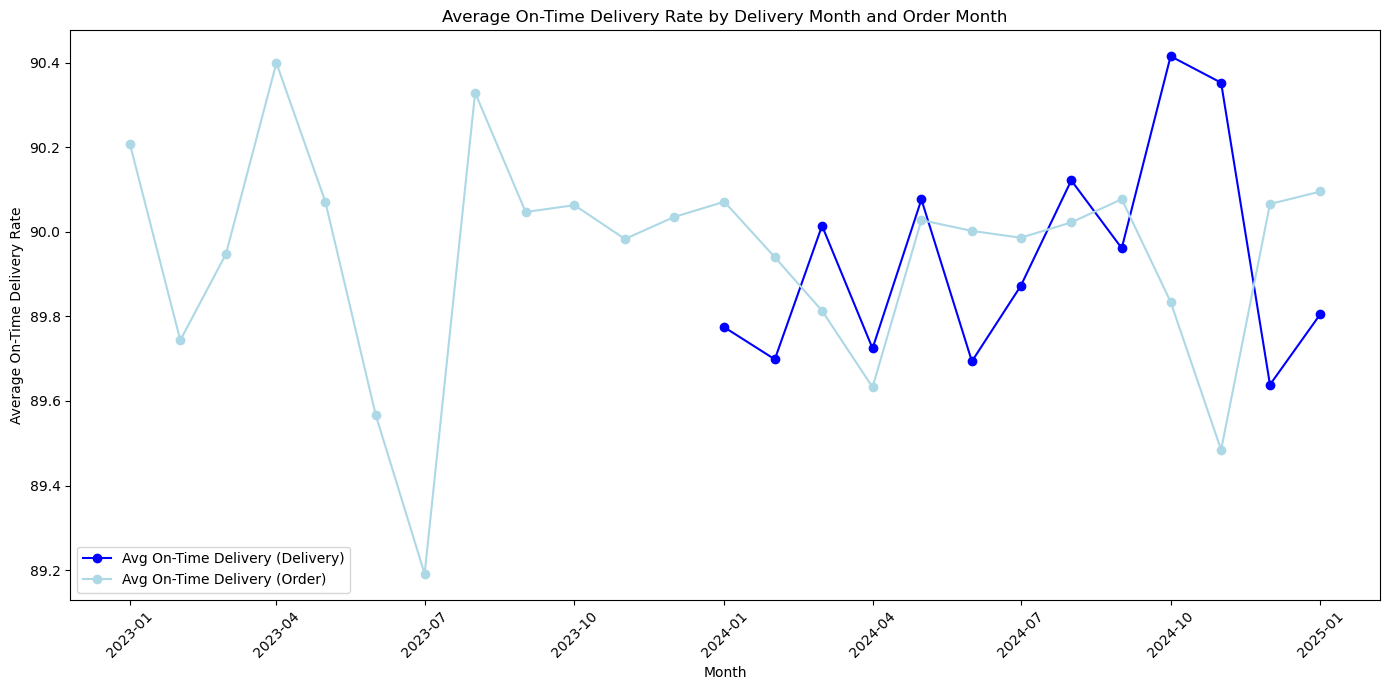

In [5]:
# Visualizing the average on-time delivery rate by delivery month and order month
plt.figure(figsize=(14, 7))
plt.plot(performance_trends_delivery['delivery_date'], performance_trends_delivery['on_time_delivery'], 
         label='Avg On-Time Delivery (Delivery)', marker='o', color='blue')
plt.plot(performance_trends_order['order_date'], performance_trends_order['on_time_delivery'], 
         label='Avg On-Time Delivery (Order)', marker='o', color='lightblue')
plt.title('Average On-Time Delivery Rate by Delivery Month and Order Month')
plt.xlabel('Month')
plt.ylabel('Average On-Time Delivery Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# This comparison enables a clear understanding of how delivery performance varies based on the timing of the delivery versus the order.
# The two lines exhibit fluctuations and do not follow a consistent trend. 
# Consistent high rates may suggest effective logistics and management, while dips may point to potential challenges or delays.

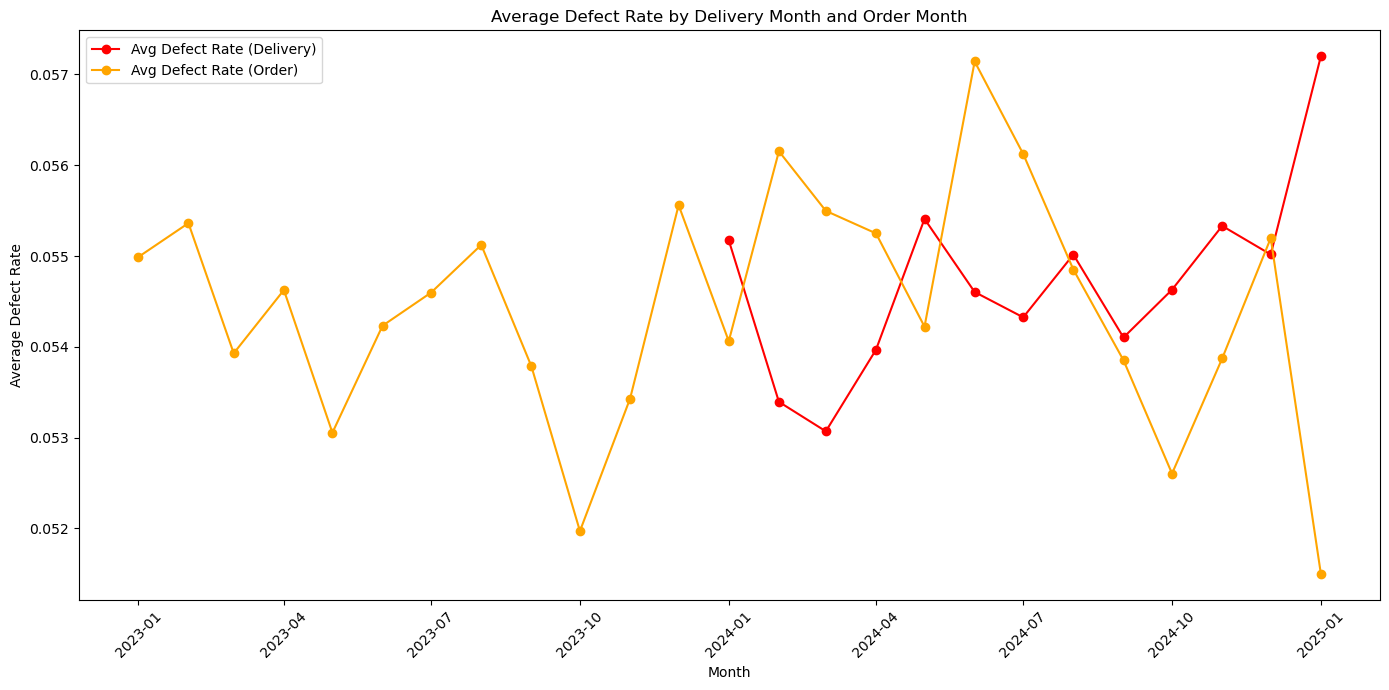

In [6]:
# Visualizing the average defect rate by delivery month and order month
plt.figure(figsize=(14, 7))
plt.plot(performance_trends_delivery['delivery_date'], performance_trends_delivery['defect_rate'], 
         label='Avg Defect Rate (Delivery)', marker='o', color='red')
plt.plot(performance_trends_order['order_date'], performance_trends_order['defect_rate'], 
         label='Avg Defect Rate (Order)', marker='o', color='orange')
plt.title('Average Defect Rate by Delivery Month and Order Month')
plt.xlabel('Month')
plt.ylabel('Average Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# The two lines show significant fluctuations and do not align in their trends.
# An increase in the defect rate may suggest issues in quality control, while a decrease could indicate improvements or better practices.

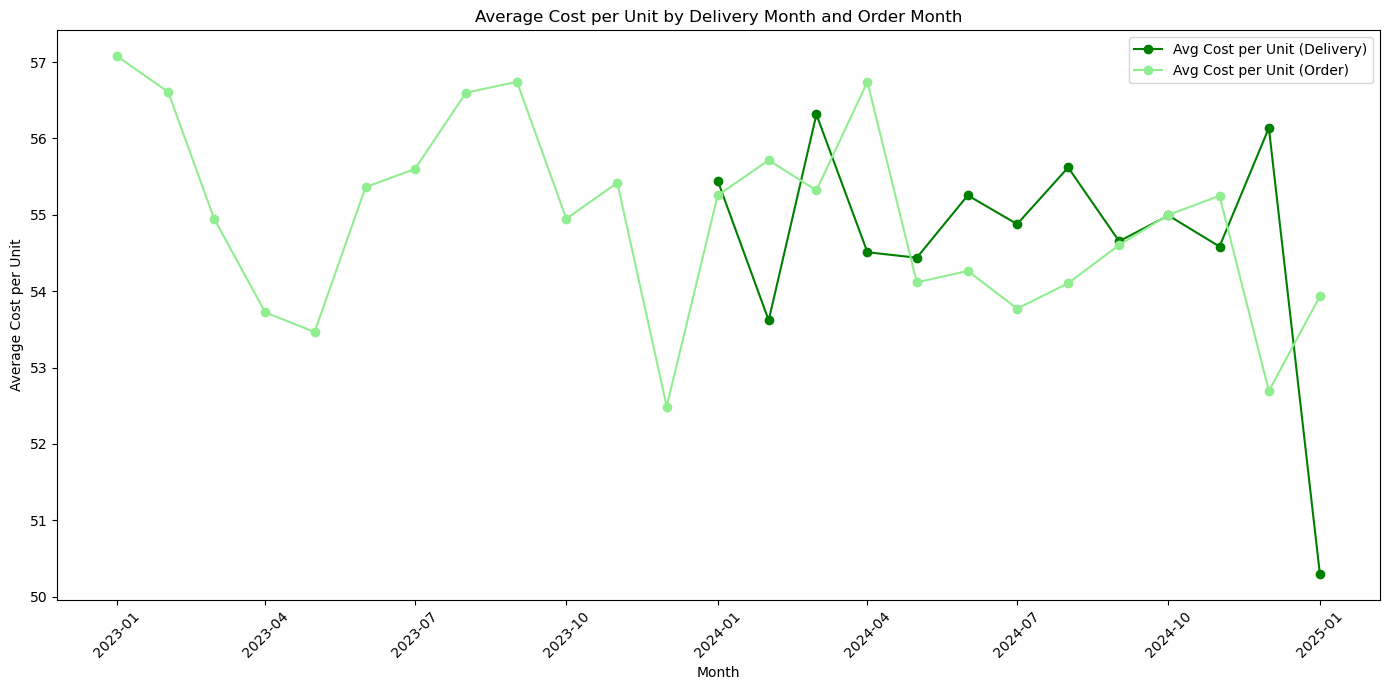

In [7]:
# Visualizing the average cost per unit by delivery month and order month
plt.figure(figsize=(14, 7))
plt.plot(performance_trends_delivery['delivery_date'], performance_trends_delivery['cost_per_unit'], 
         label='Avg Cost per Unit (Delivery)', marker='o', color='green')
plt.plot(performance_trends_order['order_date'], performance_trends_order['cost_per_unit'], 
         label='Avg Cost per Unit (Order)', marker='o', color='lightgreen')
plt.title('Average Cost per Unit by Delivery Month and Order Month')
plt.xlabel('Month')
plt.ylabel('Average Cost per Unit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# The graph illustrates fluctuations in costs over time for both delivery and order metrics.
# Spikes or dips in the lines indicate changes in costs, which may correlate with external factors such as supply chain issues, seasonal demand, or pricing strategies

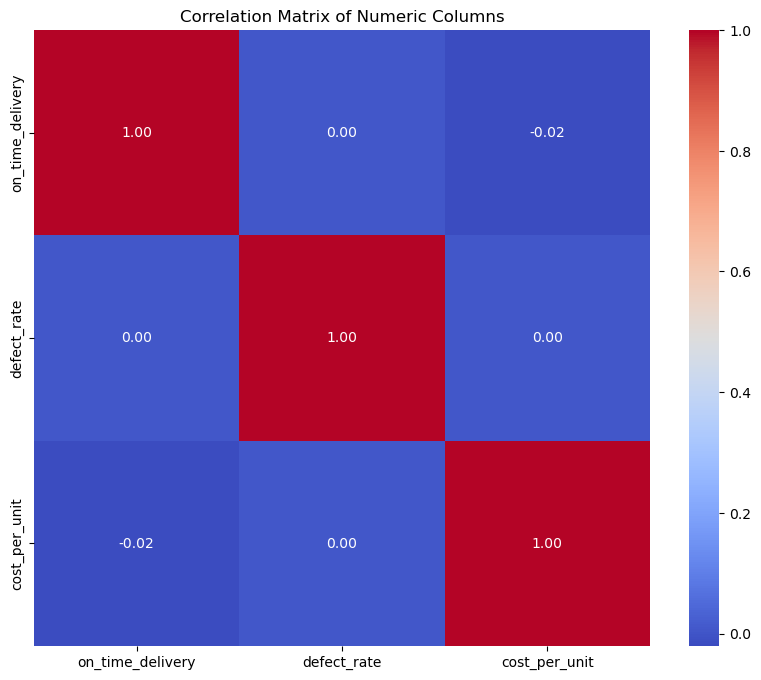

In [8]:
# Identifying the correlations between different columns:
# Select only numeric columns
numeric_data = supplier_performance.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# The matrix indicates that the variables do not have strong correlations with each other, which might suggest that factors affecting these metrics are independent of one another.

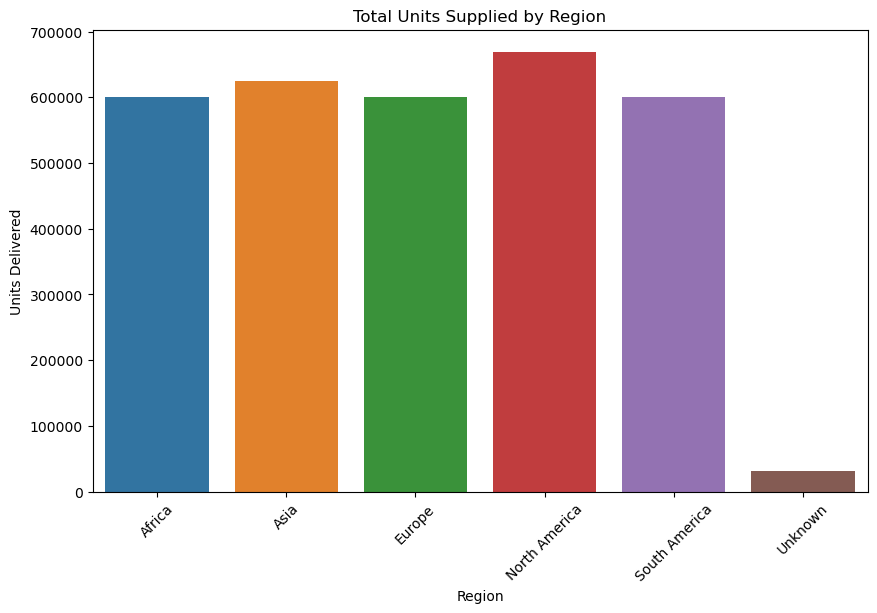

In [9]:
#Bar chart: Total units supplied by each region
total_units_region = merged_data.groupby('region')['units_delivered'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=total_units_region, x='region', y='units_delivered')
plt.title('Total Units Supplied by Region')
plt.xlabel('Region')
plt.ylabel('Units Delivered')
plt.xticks(rotation=45)
plt.show()
# The graph highlights that North America is the leading region in terms of total units supplied, suggesting a strong market presence or demand.
# The relatively equal delivery levels among Africa, Asia, South America and Europe may indicate balanced supply efforts across these regions.

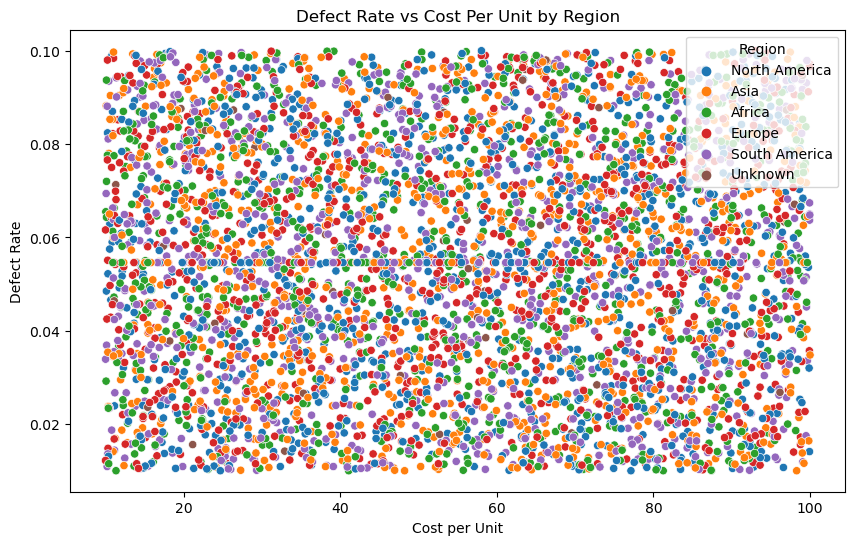

In [10]:
# Scatter plot: Defect Rate vs Cost Per Unit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supplier_performance, x='cost_per_unit', y='defect_rate', hue='region')
plt.title('Defect Rate vs Cost Per Unit by Region')
plt.xlabel('Cost per Unit')
plt.ylabel('Defect Rate')
plt.legend(title='Region', loc='upper right')
plt.show()

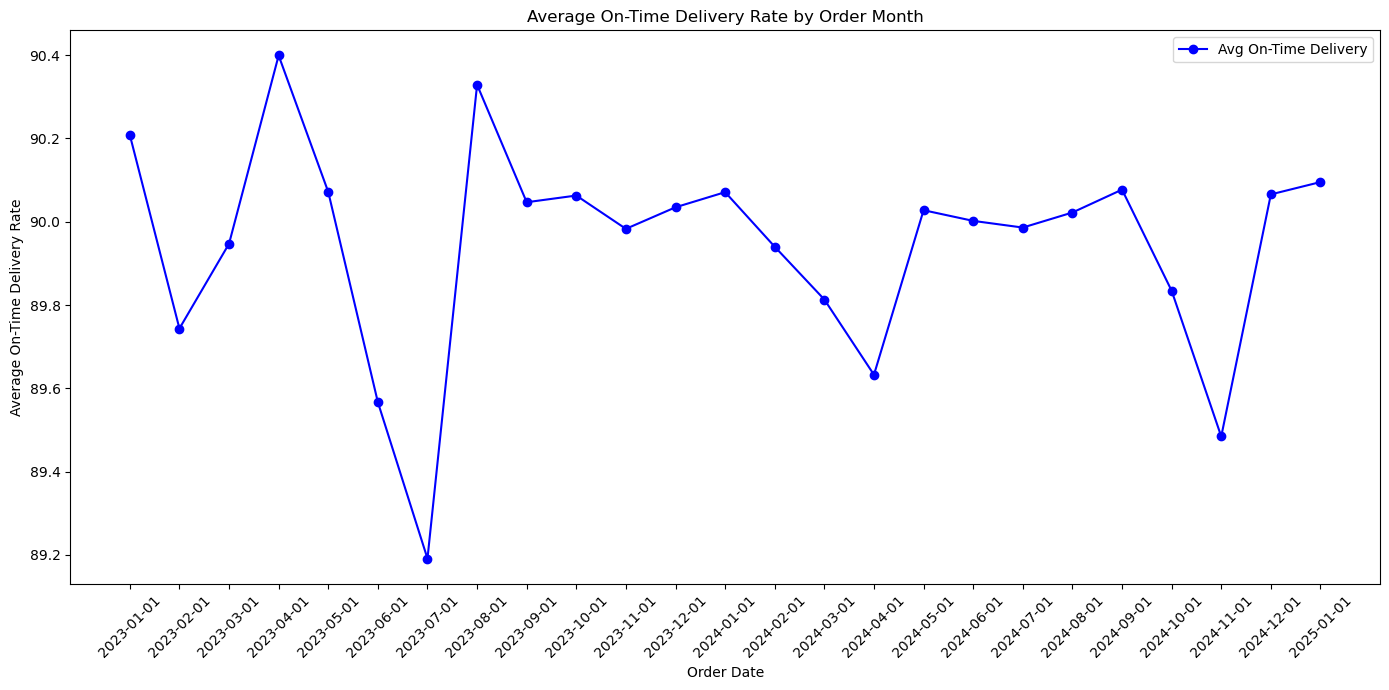

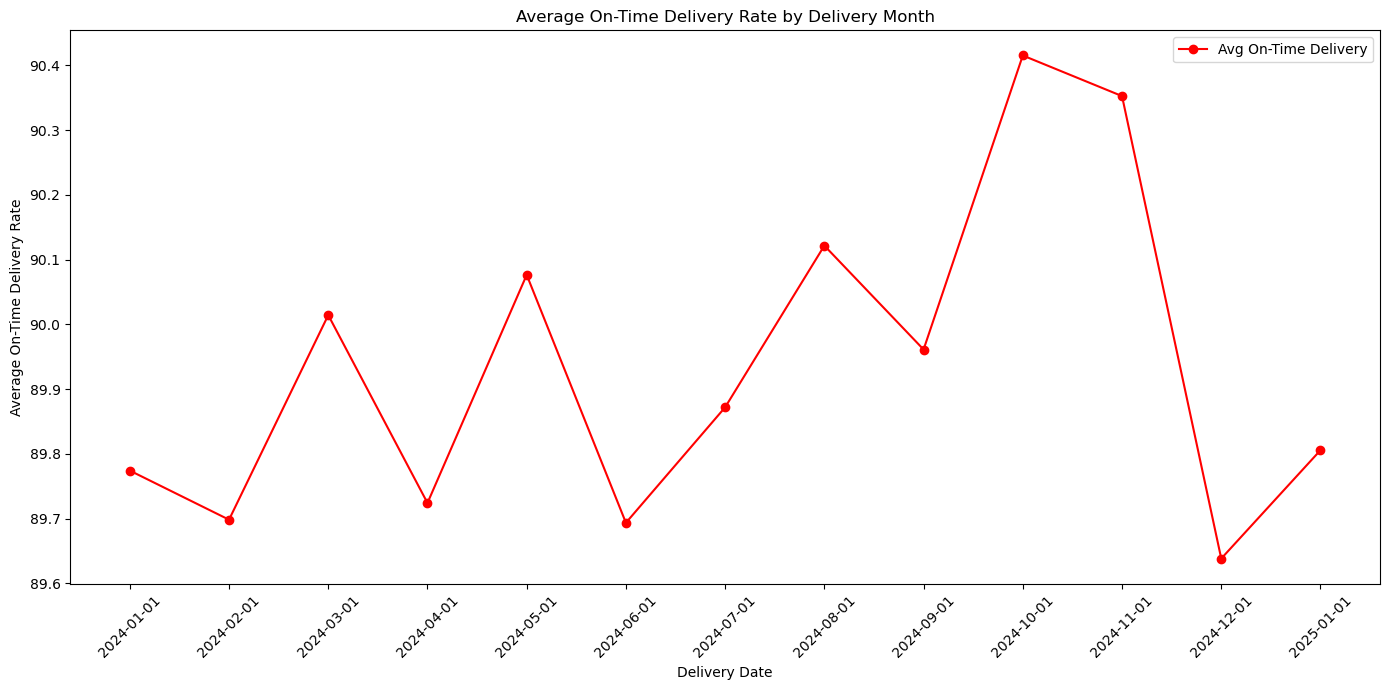

In [11]:
# Line plot: Trend of On-Time Delivery Rate over time
# Plotting the average on-time delivery rate by order month.
plt.figure(figsize=(14, 7))
plt.plot(performance_trends_order['order_date'].astype(str), performance_trends_order['on_time_delivery'], label='Avg On-Time Delivery', marker='o', color='blue')
plt.title('Average On-Time Delivery Rate by Order Month')
plt.xlabel('Order Date')
plt.ylabel('Average On-Time Delivery Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting the average on-time delivery rate by delivery month.
plt.figure(figsize=(14, 7))
plt.plot(performance_trends_delivery['delivery_date'].astype(str), performance_trends_delivery['on_time_delivery'], label='Avg On-Time Delivery', marker='o', color='red')
plt.title('Average On-Time Delivery Rate by Delivery Month')
plt.xlabel('Delivery Date')
plt.ylabel('Average On-Time Delivery Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# This comparison enables a clear understanding of how delivery performance varies based on the timing of the delivery versus the order.
# The two lines exhibit fluctuations and do not follow a consistent trend. 
# Consistent high rates may suggest effective logistics and management, while dips may point to potential challenges or delays.